In [69]:
## Generally useful built libraries

import sys
import os
import json
import math
import re
import itertools
from copy import deepcopy
from collections import defaultdict
from dataclasses import dataclass
from datetime import timedelta, datetime

## Core Data Science Libraries

# Main matplotlib usage is with `plt.whatever`
import matplotlib.pyplot as plt
# Sometimes you need style stuff via `mpl.whatever`
import matplotlib as mpl
# Statistic functions like `st.f_oneway`, `st.pearsonr`, etc.
import scipy.stats as st
# Your entire life is now pd.DataFrame(), pd.concat, etc.
import pandas as pd
# Real plotters user Seaborn over Matplotlib: sns.histplot, sns.jointplot, sns.lmplot, etc.
import seaborn as sns
# Sometimes you have to use numpy stuff, but almost always better to stay in Pandas
import numpy as np

## Quality of Life Libraries

# Progress bars! Just do:
#   for an_item in tqdm(an_iterable):
from tqdm.notebook import tqdm

# Need to render HTML or Code? Combine them with `display`
# Sometimes you will want to `print`, and sometimes `display`
from IPython.display import display, HTML, Code

## More Situational Libraries

# Situational, but sometimes natsorting is helpful
from natsort import index_natsorted, natsorted, order_by_index, natsort_keygen

# Some more useful statistic related functions in here
import sklearn.metrics as metrics

# More stats stuff, mixed effects models, generalized linear models, ODEs, etc.
import statsmodels as sm

# Probably won't need to use hidden markov models
#from hmmlearn import hmm

In [70]:
## Style Stuff

# At the minimum, make the background white so you can copy/paste into Discord :)
mpl.rcParams['figure.facecolor'] = 'white'

# Calculations I did one time for LaTeX papers, hope they're accurate..?
COLUMN_WIDTH = 240/72.27
TEXT_WIDTH = 504/72.27

# I liked this style, but use your best judgement
plt.style.use('seaborn-v0_8-whitegrid')

# Setup nice fonts for an ACM LaTeX paper
nice_fonts = {
    # Ideally, you should enable this if you have LaTeX installed
    # It'll make the graphs match the paper font much more closely.
    # "text.usetex": True,
    "text.usetex": False,
    
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}
mpl.rcParams.update(nice_fonts)
   
# Stop using scientific notation, show two decimal places instead.
pd.set_option('display.float_format', '{:.2f}'.format)

In [71]:
## Helper Functions

def save_figure(filename, fig=None, folder='reports/figures/'):
    """ Helper function to quickly save figures for the paper. """
    if fig is None:
        fig = plt
    fig.savefig(os.path.join(folder, filename), format='pdf', bbox_inches='tight')

def display_code(data):
    return display(Code(data))

display_code("a = 0")

def set_size(width, fraction=1, subplots=(1, 1)):
    """ Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    elif width == 'pnas':
        width_pt = 246.09686
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)
    
import re

def tex_escape(text):
    """
        :param text: a plain text message
        :return: the message escaped to appear correctly in LaTeX
    """
    conv = {
        '&': r'\&',
        '%': r'\%',
        '$': r'\$',
        '#': r'\#',
        '_': r'\_',
        '{': r'\{',
        '}': r'\}',
        '~': r'\textasciitilde{}',
        '^': r'\^{}',
        '\\': r'\textbackslash{}',
        '<': r'\textless{}',
        '>': r'\textgreater{}',
    }
    regex = re.compile('|'.join(re.escape(str(key)) for key in sorted(conv.keys(), key = lambda item: - len(item))))
    return regex.sub(lambda match: conv[match.group()], text)

### Good Research Stuff
# Choose a consistent alpha threshold for P-Value calculations
ALPHA = .05

def proportion_stats(incidences, total, label=None):
    """ Pretty prints a proportion with APA-style statistics. """
    proportion = incidences/total
    rounded_proportion = round(100*proportion*10)/10
    standard_deviation = math.sqrt(proportion*(1-proportion))/math.sqrt(total)
    rounded_sd = round(100*standard_deviation)/100
    result = f"n={incidences}, M={rounded_proportion}%, SD={rounded_sd}"
    if label is None:
        return result
    else:
        print(label, result)
print(proportion_stats(50, 100))
proportion_stats(75, 103, 'Test Case')


def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

a = 0

n=50, M=50.0%, SD=0.05
Test Case n=75, M=72.8%, SD=0.04


In [72]:
data = {
    'unincluded': {},
    'included_1': {},
    'included_2': {}
}

parent_dir = os.path.dirname(os.getcwd()).rstrip("\\/") + '/chosen_problems_st3-3_as3-3_at1_v1'
no_question_files = [entry for entry in os.listdir(f'{parent_dir}/_feedback_results') if entry.endswith('.ini')]
question_files1 = [entry for entry in os.listdir(f'{parent_dir}/_feedback_results_include_question') if entry.endswith('.ini')]
question_files2 = [entry for entry in os.listdir(f'{parent_dir}/_feedback_results_include_question2') if entry.endswith('.ini')]


def add_data(path, data_set):
    global data
    
    filename = file.split('/')[-1].split('\\')[-1]
    
    # todo: remove when data is in
    if filename == 'gpt-4-0613-temp-2.0-top_p-0.0-1.ini' or filename == 'gpt-4-0613-temp-1.0-top_p-1.0-1.ini':
        return
    
    data[data_set][filename] = {}
    
    # Only works with gpt-4-0613
    # Next time add this data to the ini [global] section
    filename_tokens = filename.split('-')
    data[data_set][filename]['_temp'] = float(filename_tokens[4])
    data[data_set][filename]['_top_p'] = float(filename_tokens[6])
    data[data_set][filename]['_trial'] = float(filename_tokens[7].split('.')[0])
    
    with open(path, encoding='utf-8') as ini_file:
        line_num = 0
        assignment = ''
        student = ''
        for line in ini_file.readlines():
            line_num += 1
            if line.startswith('[global]'):
                continue
            if line.startswith('[') and '.' not in line:
                assignment = line.strip('[]\n')
                data[data_set][filename][assignment] = {}
                continue
            elif line.startswith('[') and '.' in line:
                student = line.split('.')[1].split('_')[0]
                data[data_set][filename][assignment][student] = {}
                continue
            
            if len(assignment) == len(student) == 0:
                continue
            
            if line.startswith('instructor_feedback'):
                parts = [i.strip() for i in line.split('=')]
                try:
                    data[data_set][filename][assignment][student][parts[0]] = max(1, min(int(parts[1]), 5))  # clamp to 1-5 inclusive
                except (IndexError, ValueError):
                    print(f'Missing value for {parts[0]} at line {line_num} in {file}')


for file in no_question_files:
    add_data(f'{parent_dir}/_feedback_results/{file}', 'unincluded')

for file in question_files1:
    add_data(f'{parent_dir}/_feedback_results_include_question/{file}', 'included_1')

for file in question_files2:
    add_data(f'{parent_dir}/_feedback_results_include_question2/{file}', 'included_2')

In [73]:
data_fields = ('accurate', 'concise', 'clear', 'jargon', 'sentiment')
data_points = {
    'instructor_feedback_gpt_accurate': [],
    'instructor_feedback_gpt_concise': [],
    'instructor_feedback_gpt_clear': [],
    'instructor_feedback_gpt_jargon': [],
    'instructor_feedback_gpt_sentiment': [],
    'instructor_feedback_pedal_accurate': [],
    'instructor_feedback_pedal_concise': [],
    'instructor_feedback_pedal_clear': [],
    'instructor_feedback_pedal_jargon': [],
    'instructor_feedback_pedal_sentiment': []
}

student_data_aggregate_blank = {
    'Beedrill': deepcopy(data_points),
    'Buizel': deepcopy(data_points),
    'Darumaka': deepcopy(data_points),
    'Elgyem': deepcopy(data_points),
    'Girafarig': deepcopy(data_points),
    'Lapras': deepcopy(data_points),
    'Liepard': deepcopy(data_points),
    'Nosepass': deepcopy(data_points),
    'Nuzleaf': deepcopy(data_points)
}
student_data_aggregate = {
    'unincluded': deepcopy(student_data_aggregate_blank),
    'included_1': deepcopy(student_data_aggregate_blank),
    'included_2': deepcopy(student_data_aggregate_blank)
}

assignment_data_aggregate_blank = {
    'bakery_intro_programs_code_try_blockpy': deepcopy(data_points),
    'bakery_structures_lists_code_emptiness': deepcopy(data_points),
    'bakery_structures_lists_code_book_list': deepcopy(data_points),
    'bakery_intro_import_code_import_variable': deepcopy(data_points),
    'bakery_advanced_plotting_code_basic_scatter': deepcopy(data_points),
    'bakery_functions_flow_code_timely_extraction': deepcopy(data_points),
    'bakery_if_patterns_make_pig_latin': deepcopy(data_points),
    'bakery_nesting_list_dataclasses_code_good_job': deepcopy(data_points),
    'bakery_for_composition_code_highest_filter': deepcopy(data_points)
}
assignment_data_aggregate = {
    'unincluded': deepcopy(assignment_data_aggregate_blank),
    'included_1': deepcopy(assignment_data_aggregate_blank),
    'included_2': deepcopy(assignment_data_aggregate_blank)
}

all_data_aggregate = {
    'unincluded': deepcopy(data_points),
    'included_1': deepcopy(data_points),
    'included_2': deepcopy(data_points)
}

for data_set in data.keys():
    for filename, file in data[data_set].items():
        for assignment_name, assignment in file.items():
            if assignment_name.startswith('_'):
                continue
            for student_name, student in assignment.items():
                for score_category, score in student.items():
                    student_data_aggregate[data_set][student_name][score_category].append(score)
                    assignment_data_aggregate[data_set][assignment_name][score_category].append(score)
                    all_data_aggregate[data_set][score_category].append(score)

In [74]:
# IRR between included_1 and included_2

irr_data_blank = {
    'included_1': [],
    'included_2': []
}
irr_data_gpt = deepcopy(irr_data_blank)
irr_data_pedal = deepcopy(irr_data_blank)
irr_data_all = deepcopy(irr_data_blank)

irr_data_categorized = {
    'included_1': deepcopy(data_points),
    'included_2': deepcopy(data_points)
}

for data_set in irr_data_blank.keys():
    for data_field in data_fields:
        irr_data_gpt[data_set].extend(all_data_aggregate[data_set][f'instructor_feedback_gpt_{data_field}'])
        irr_data_pedal[data_set].extend(all_data_aggregate[data_set][f'instructor_feedback_pedal_{data_field}'])
        irr_data_all[data_set].extend(all_data_aggregate[data_set][f'instructor_feedback_gpt_{data_field}'])
        irr_data_all[data_set].extend(all_data_aggregate[data_set][f'instructor_feedback_pedal_{data_field}'])
        (irr_data_categorized[data_set][f'instructor_feedback_gpt_{data_field}']
            .extend(all_data_aggregate[data_set][f'instructor_feedback_gpt_{data_field}']))
        (irr_data_categorized[data_set][f'instructor_feedback_pedal_{data_field}']
            .extend(all_data_aggregate[data_set][f'instructor_feedback_pedal_{data_field}']))

print('IRR for GPT judgements:', metrics.cohen_kappa_score(irr_data_gpt['included_1'], irr_data_gpt['included_2'], labels=None, weights=None))
print('IRR for Pedal judgements:', metrics.cohen_kappa_score(irr_data_pedal['included_1'], irr_data_pedal['included_2'], labels=None, weights=None))
print('IRR for all judgements:', metrics.cohen_kappa_score(irr_data_all['included_1'], irr_data_all['included_2'], labels=None, weights=None))

print()
for data_field in data_fields:
    for feedback_type in ('gpt', 'pedal'):
        print('IRR for', feedback_type, data_field + ':', metrics.cohen_kappa_score(irr_data_categorized['included_1'][f'instructor_feedback_{feedback_type}_{data_field}'], irr_data_categorized['included_2'][f'instructor_feedback_{feedback_type}_{data_field}'], labels=None, weights=None))

IRR for GPT judgements: 0.34678457160258636
IRR for Pedal judgements: 0.30275813737586876
IRR for all judgements: 0.32603889113935713

IRR for gpt accurate: 0.0816660663413995
IRR for pedal accurate: 0.042091754237259305
IRR for gpt concise: 0.12511471397981022
IRR for pedal concise: 0.1417355120620608
IRR for gpt clear: 0.21101037569895198
IRR for pedal clear: 0.17945155634944265
IRR for gpt jargon: 0.00017921555226474428
IRR for pedal jargon: 0.13431569135699462
IRR for gpt sentiment: 0.4404969743751942
IRR for pedal sentiment: 0.41011168021282296


In [75]:
def set_boxplot_color(bp, color: str):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)


def draw_boxplot(title, gpt_values, pedal_values):
    # https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
    plt.figure()
    bp_gpt = plt.boxplot(gpt_values, positions=np.array(range(len(gpt_values)))*2.0-0.4, sym='', widths=0.6)
    bp_pedal = plt.boxplot(pedal_values, positions=np.array(range(len(pedal_values)))*2.0+0.4, sym='', widths=0.6)
    set_boxplot_color(bp_gpt, 'green')
    set_boxplot_color(bp_pedal, 'blue')
    
    plt.plot([], c='green', label='GPT')
    plt.plot([], c='blue', label='Pedal')
    plt.legend()
    
    plt.xticks(range(0, len(data_fields) * 2, 2), data_fields)
    plt.xlim(-2, len(data_fields) * 2)
    plt.ylim(0.5, 5.5)
    plt.tight_layout()
    
    plt.title(title)
    plt.show()

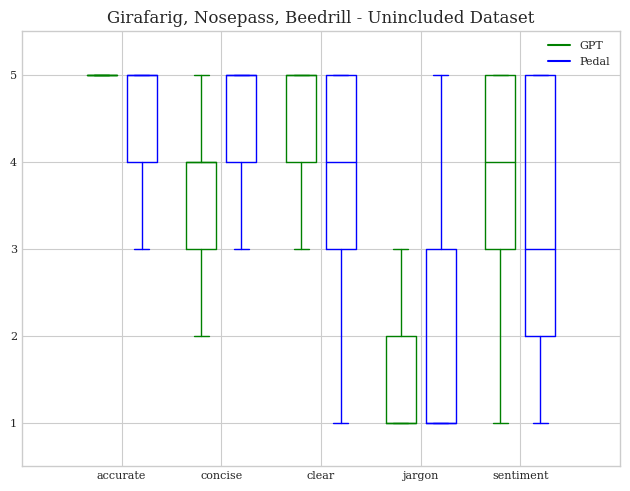

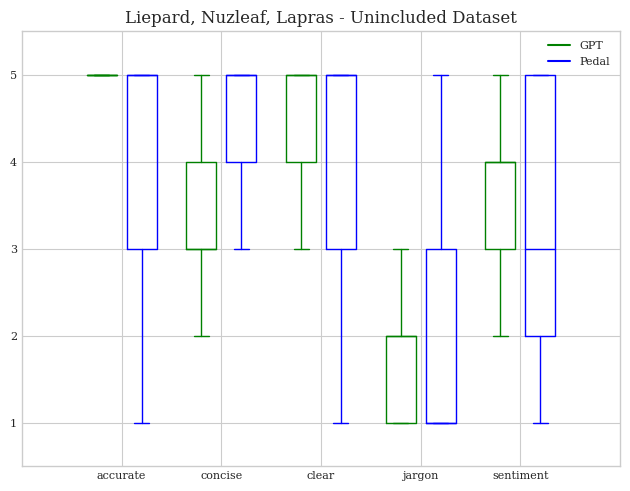

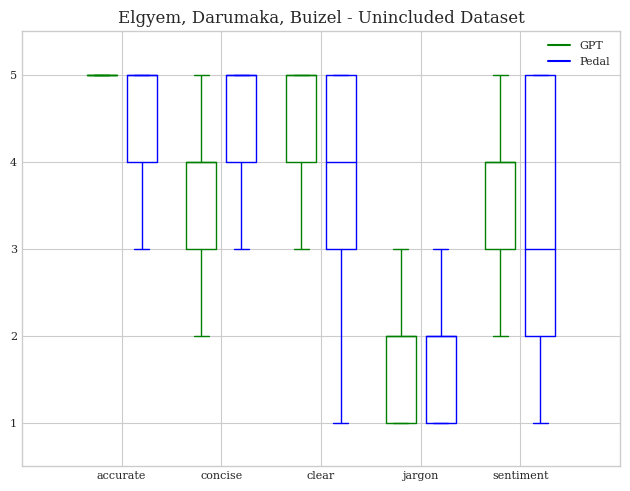

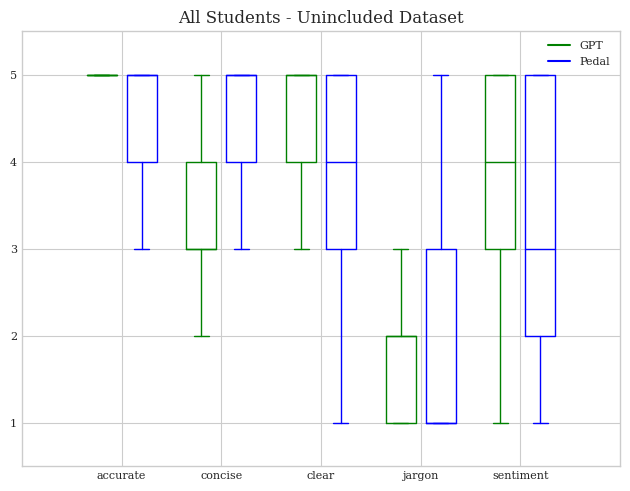

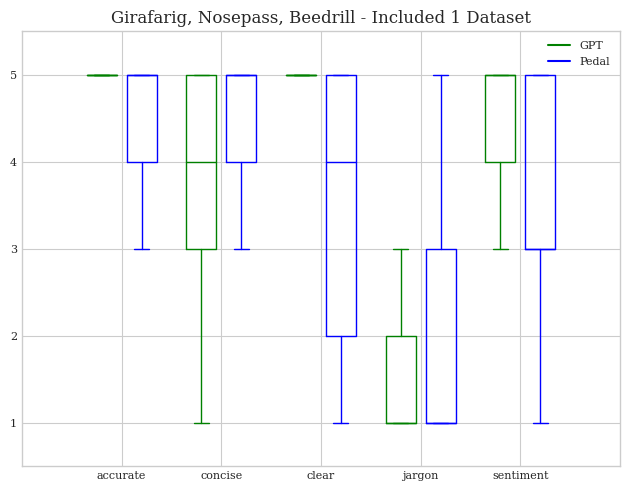

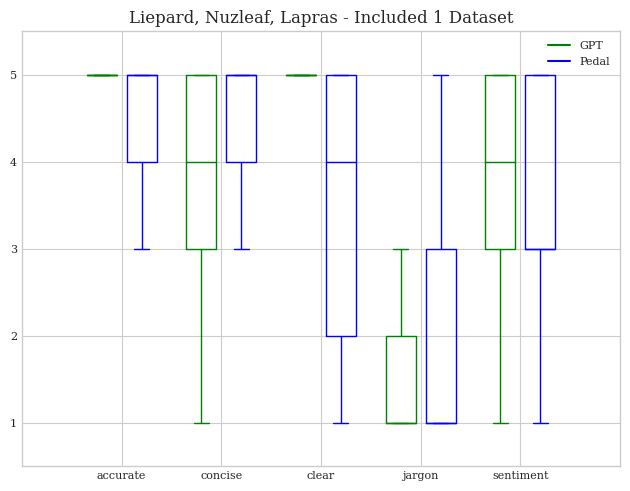

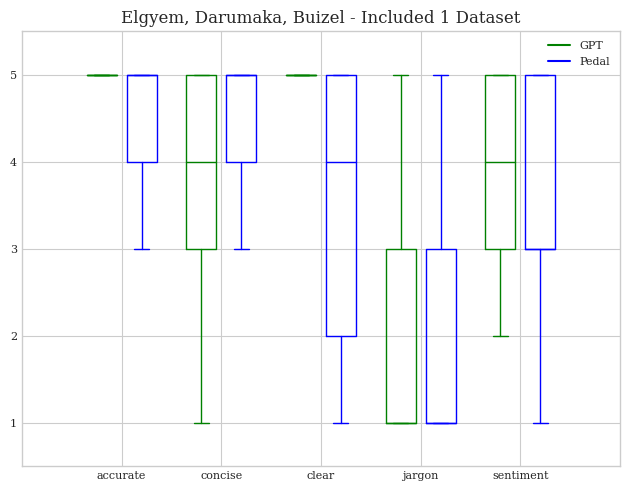

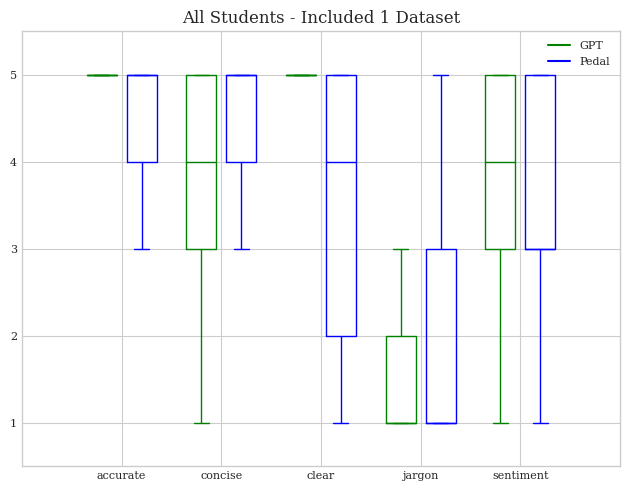

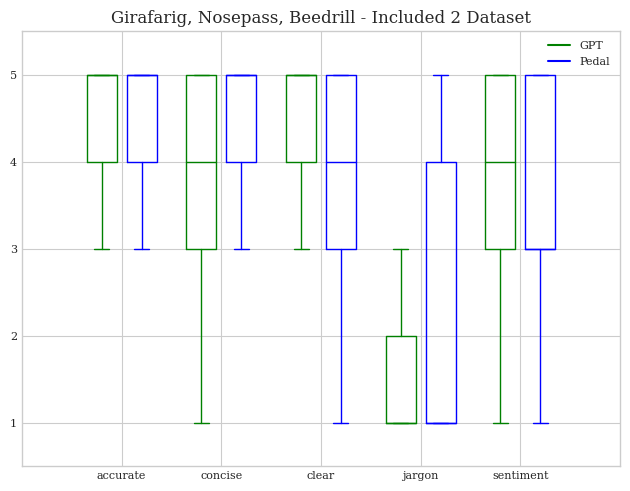

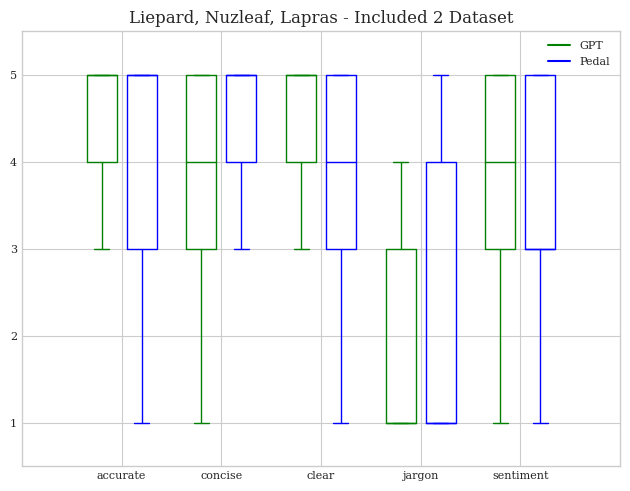

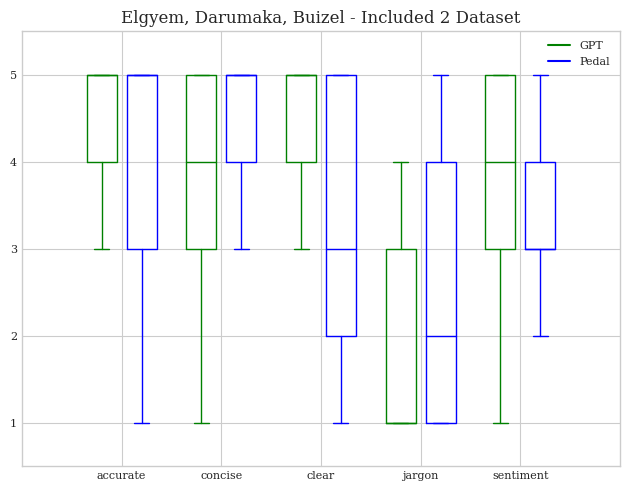

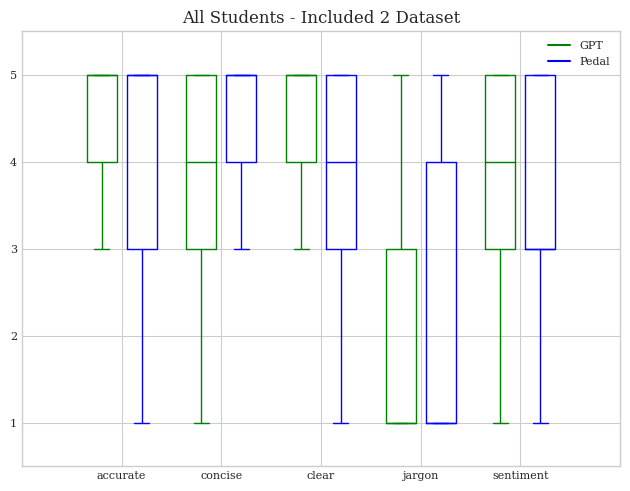

In [76]:
# For subject ids "Girafarig", "Nosepass", and "Beedrill" we should get the average judgements for all 10 judgement points.
# Same for "Liepard", "Nuzleaf", and "Lapras" as well as for "Elgygem", "Darumaka" and "Buizel".
# The three pairs of three here represent the different student performances (so yes we will want them to be grouped).

students = ('Girafarig', 'Nosepass', 'Beedrill', 'Liepard', 'Nuzleaf', 'Lapras', 'Elgyem', 'Darumaka', 'Buizel')
student_bundles = (
    ('Girafarig', 'Nosepass', 'Beedrill'),
    ('Liepard', 'Nuzleaf', 'Lapras'),
    ('Elgyem', 'Darumaka', 'Buizel')
)

for data_set in data.keys():
    for student_bundle in student_bundles:
        student_plot_data_gpt = [[] for i in range(len(data_fields))]
        student_plot_data_pedal = [[] for i in range(len(data_fields))]
        for i, data_field in enumerate(data_fields):
            for student_name in student_bundle:
                student_plot_data_gpt[i].extend(student_data_aggregate[data_set][student_name][f'instructor_feedback_gpt_{data_field}'])
                student_plot_data_pedal[i].extend(student_data_aggregate[data_set][student_name][f'instructor_feedback_pedal_{data_field}'])
        
        draw_boxplot(f'{", ".join(student_bundle)} - {data_set.capitalize().replace("_", " ")} Dataset', student_plot_data_gpt, student_plot_data_pedal)
    
    student_plot_data_gpt = [[] for i in range(len(data_fields))]
    student_plot_data_pedal = [[] for i in range(len(data_fields))]
    for i, data_field in enumerate(data_fields):
        for student_name in students:
            student_plot_data_gpt[i].extend(student_data_aggregate[data_set][student_name][f'instructor_feedback_gpt_{data_field}'])
            student_plot_data_pedal[i].extend(student_data_aggregate[data_set][student_name][f'instructor_feedback_pedal_{data_field}'])
    
    draw_boxplot(f'All Students - {data_set.capitalize().replace("_", " ")} Dataset', student_plot_data_gpt, student_plot_data_pedal)

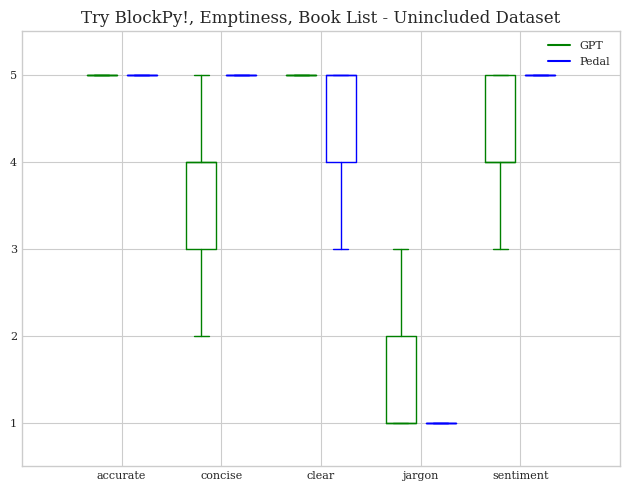

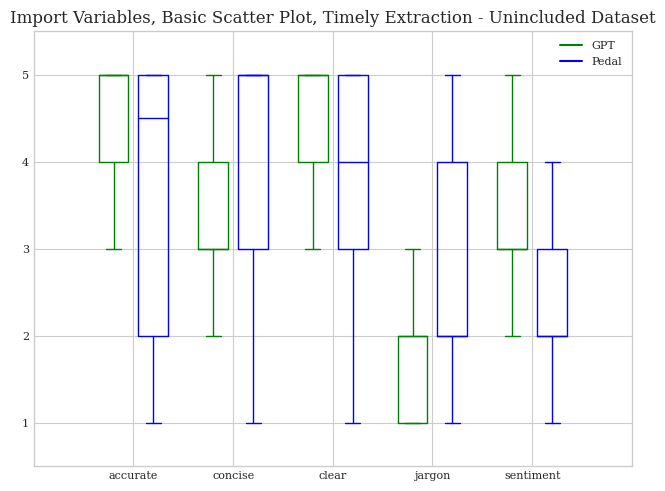

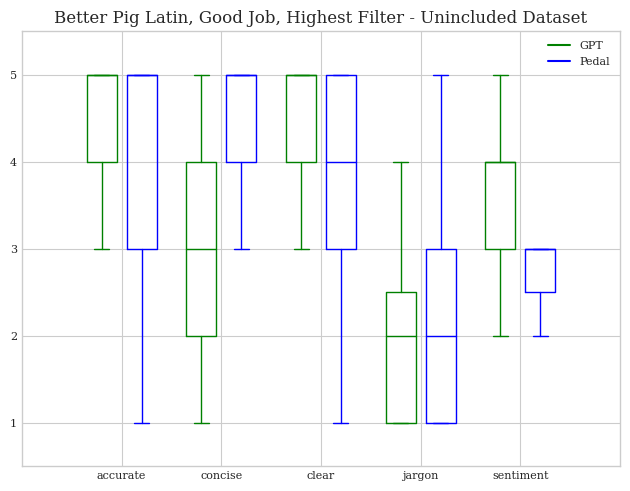

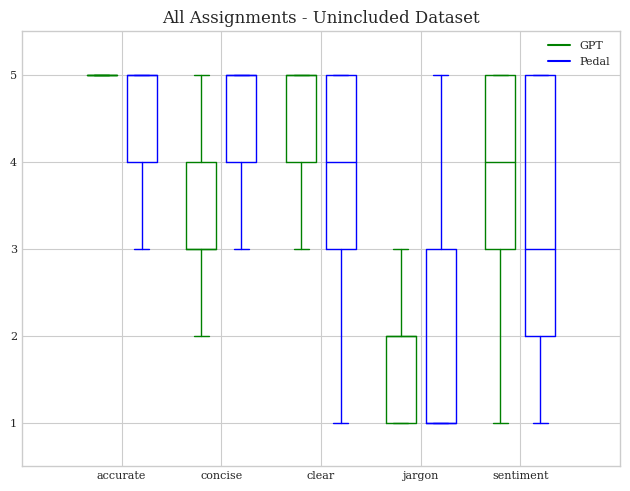

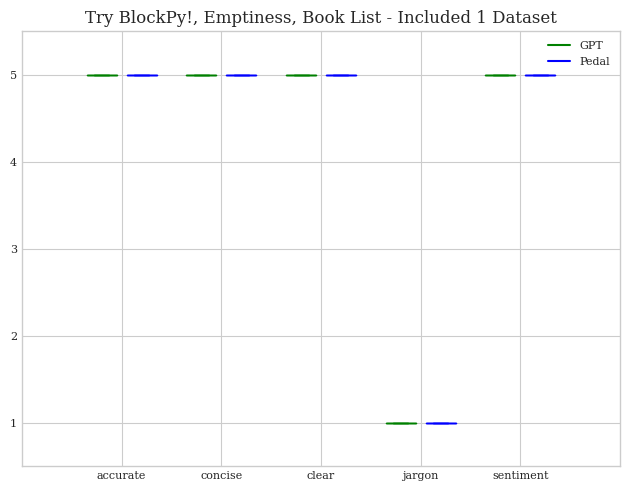

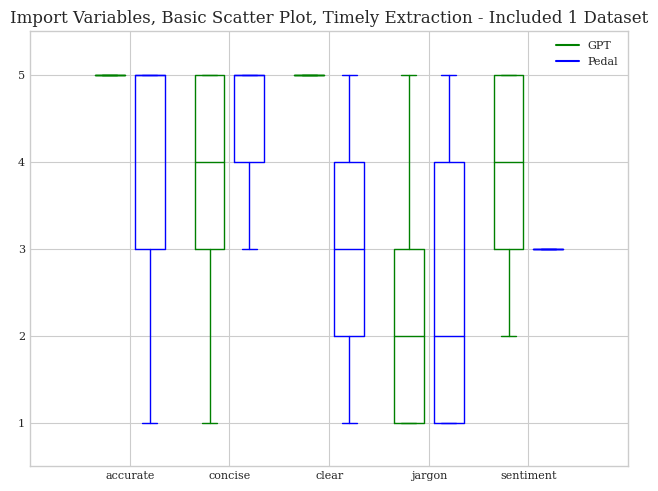

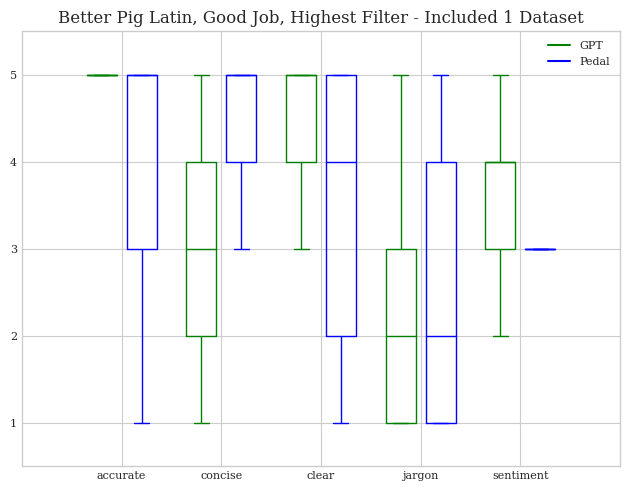

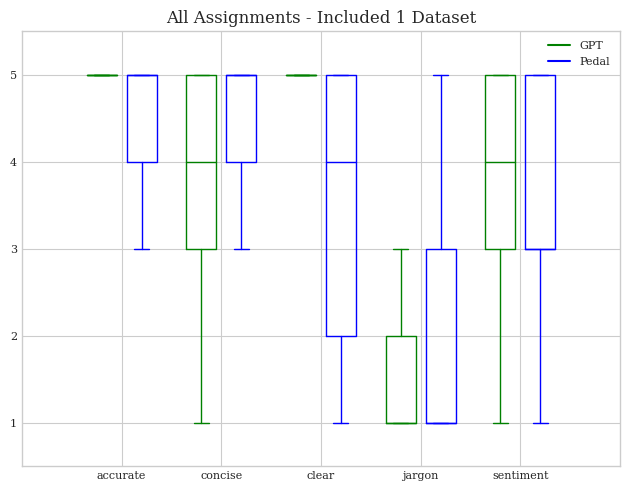

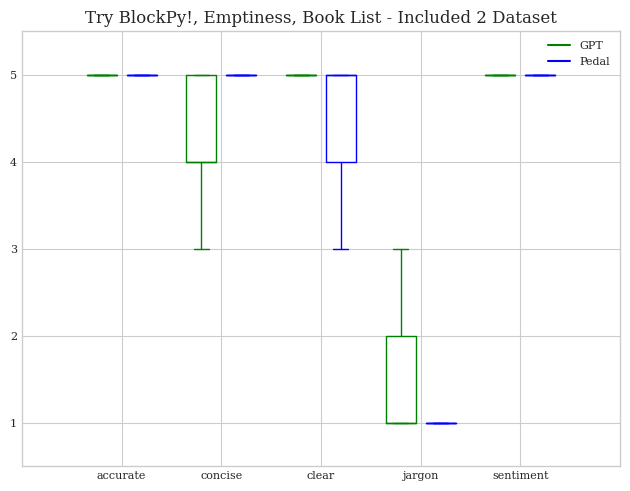

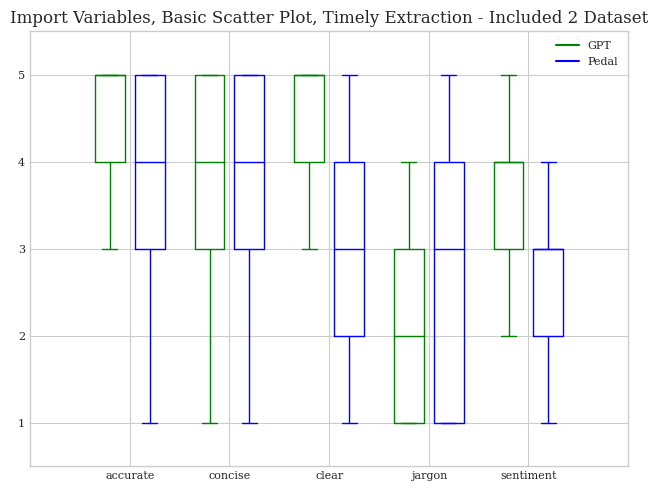

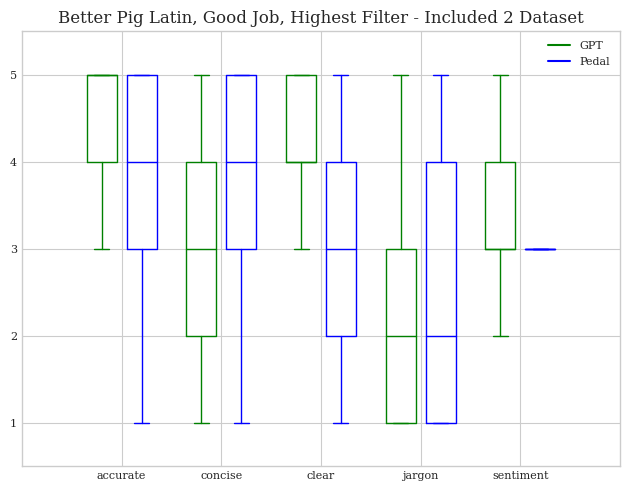

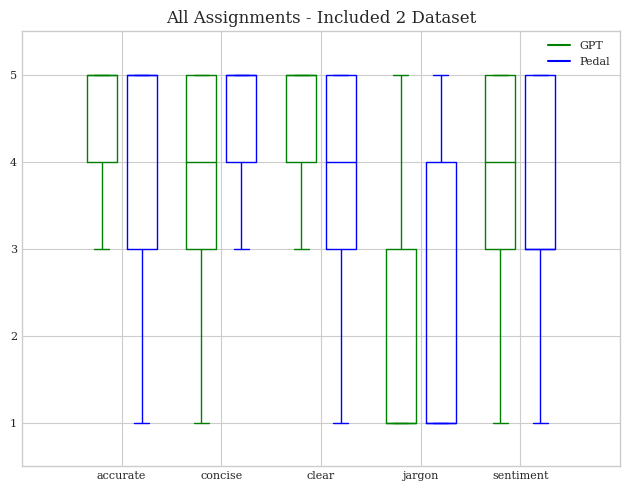

In [77]:
# Additionally, for assignment names "1A2.1) Try BlockPy!", "4B1.3) Emptiness", and "4B1.2) Book List" we should get the average judgements for all 10 judgement points.
# Same for "1B5.1) Import Variables",  "11A1.5) Basic Scatter Plot", and "2B3.1) Timely Extraction" as well as "3B2.2) Better Pig Latin", "8A1.4) Good Job", and "6B2.4) Highest Filter".
# Same grouping here: three assignments per category. We will want to analyze them in such a way.

assignments = {
    'bakery_intro_programs_code_try_blockpy': 'Try BlockPy!',
    'bakery_structures_lists_code_emptiness': 'Emptiness',
    'bakery_structures_lists_code_book_list': 'Book List',
    'bakery_intro_import_code_import_variable': 'Import Variables',
    'bakery_advanced_plotting_code_basic_scatter': 'Basic Scatter Plot',
    'bakery_functions_flow_code_timely_extraction': 'Timely Extraction',
    'bakery_if_patterns_make_pig_latin': 'Better Pig Latin',
    'bakery_nesting_list_dataclasses_code_good_job': 'Good Job',
    'bakery_for_composition_code_highest_filter': 'Highest Filter'
}
assignment_bundles = (
    ('bakery_intro_programs_code_try_blockpy', 'bakery_structures_lists_code_emptiness', 'bakery_structures_lists_code_book_list'),
    ('bakery_intro_import_code_import_variable', 'bakery_advanced_plotting_code_basic_scatter', 'bakery_functions_flow_code_timely_extraction'),
    ('bakery_if_patterns_make_pig_latin', 'bakery_nesting_list_dataclasses_code_good_job', 'bakery_for_composition_code_highest_filter')
)

for data_set in data.keys():
    for assignment_bundle in assignment_bundles:
        assignment_plot_data_gpt = [[] for i in range(len(data_fields))]
        assignment_plot_data_pedal = [[] for i in range(len(data_fields))]
        for i, data_field in enumerate(data_fields):
            for assignment_name in assignment_bundle:
                assignment_plot_data_gpt[i].extend(assignment_data_aggregate[data_set][assignment_name][f'instructor_feedback_gpt_{data_field}'])
                assignment_plot_data_pedal[i].extend(assignment_data_aggregate[data_set][assignment_name][f'instructor_feedback_pedal_{data_field}'])
        
        draw_boxplot(f'{", ".join([assignments[i] for i in assignment_bundle])} - {data_set.capitalize().replace("_", " ")} Dataset', assignment_plot_data_gpt, assignment_plot_data_pedal)
    
    assignment_plot_data_gpt = [[] for i in range(len(data_fields))]
    assignment_plot_data_pedal = [[] for i in range(len(data_fields))]
    for i, data_field in enumerate(data_fields):
        for assignment_name in assignments.keys():
            assignment_plot_data_gpt[i].extend(assignment_data_aggregate[data_set][assignment_name][f'instructor_feedback_gpt_{data_field}'])
            assignment_plot_data_pedal[i].extend(assignment_data_aggregate[data_set][assignment_name][f'instructor_feedback_pedal_{data_field}'])

    draw_boxplot(f'All Assignments - {data_set.capitalize().replace("_", " ")} Dataset', assignment_plot_data_gpt, assignment_plot_data_pedal)

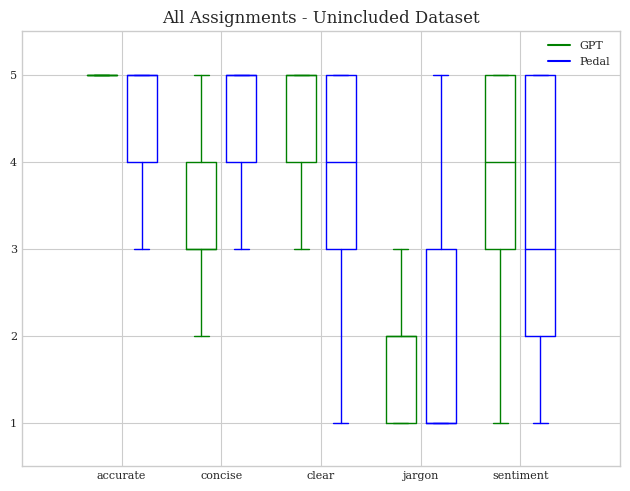

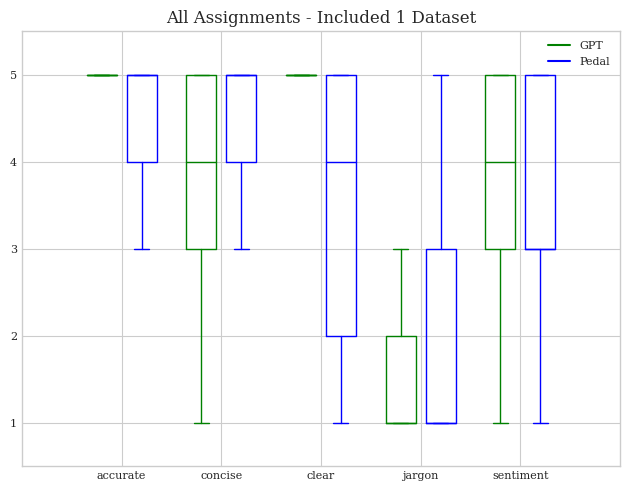

In [78]:
# Lastly, we should get the average for all 10 judgement points across all files.

# todo: included_2
for data_set in ['unincluded', 'included_1']: #data.keys():
    all_plot_data_gpt = [[] for i in range(len(data_fields))]
    all_plot_data_pedal = [[] for i in range(len(data_fields))]
    for i, data_field in enumerate(data_fields):
        all_plot_data_gpt[i].extend(all_data_aggregate[data_set][f'instructor_feedback_gpt_{data_field}'])
        all_plot_data_pedal[i].extend(all_data_aggregate[data_set][f'instructor_feedback_pedal_{data_field}'])

    draw_boxplot(f'All Assignments - {data_set.capitalize().replace("_", " ")} Dataset', all_plot_data_gpt, all_plot_data_pedal)

In [79]:
# need mean, median, stdev, iqr
# Seaborn and pandas can spit that stuff out fairly fast